#EDA - MIMIC-CXR dataset

In [1]:
!pip install transformers -q
!pip install sentencepiece -q

     |████████████████████████████████| 3.1 MB 4.2 MB/s 
     |████████████████████████████████| 3.3 MB 44.0 MB/s 
     |████████████████████████████████| 59 kB 5.8 MB/s 
     |████████████████████████████████| 895 kB 69.6 MB/s 
     |████████████████████████████████| 596 kB 64.2 MB/s 
     |████████████████████████████████| 1.2 MB 4.2 MB/s 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import sklearn


In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
chexpert_df = pd.read_csv("/content/drive/My Drive/Final project - Zebra/Data/medical tags and reports.csv")
chexpert_df.head()

,path,medical tags,report_impression,report_findings,start_report
0,files/p10/p10000032/s50414267.txt,No Finding positive,IMPRESSION: No acute cardiopulmonary process.,"FINDINGS: There is no focal consolidation, ...",FINAL REPORT ...
1,files/p10/p10000032/s53189527.txt,No Finding positive,IMPRESSION: No acute cardiopulmonary abnorm...,"FINDINGS: The cardiac, mediastinal and hila...",FINAL REPORT ...
2,files/p10/p10000032/s53911762.txt,No Finding positive,IMPRESSION: No acute intrathoracic process.,FINDINGS: Single frontal view of the chest ...,FINAL REPORT ...
3,files/p10/p10000032/s56699142.txt,No Finding positive,IMPRESSION: No acute cardiopulmonary process.,FINDINGS: The lungs are clear of focal cons...,FINAL REPORT ...
4,files/p10/p10000764/s57375967.txt,"Consolidation positive ,Pneumonia uncertain",IMPRESSION: Focal consolidation at the left...,FINDINGS: PA and lateral views of the chest...,FINAL REPORT ...


In [12]:
def frequent_words(n, df, column):
    #extract the top n words in a df column

    #Parameters:
    #    n :number of words to return
    #    df: the given dataframe
    #    column: the given column in the dataframe

    #Returns:
    #    the top n most frequent words in the given column
    
    #count the words in the given column
    count_freq ={}
    for index, report in df.iterrows():
        impression_str = str(report[column]) 
        for word in re.findall(r'\w+', impression_str):
            if word not in count_freq.keys():
                count_freq.update({word:1}) 
            else:
                count_freq[word]+=1
     
    #sort from most frequent to the less
    count_freq = dict(sorted(count_freq.items(), key=lambda item: item[1], reverse = True))   
    
    #extract only the first n words
    frequent_words = []
    for index, key in enumerate(count_freq):
        if index<n:
            frequent_words.append(key)
        else:
            break
            
    return frequent_words
        
def word_count(df, column):
    #count words for every sample in a given column

    #Parameters:
    #    df: the given dataframe
    #    column: the given column in the dataframe

    #Returns:
    #    1-D vector of word count for every sample

    len_vector = []
    for text in df[column]:
        text = str(text)
        if len(text.split()) > 0:
          len_vector.append(len(text.split()))

    return len_vector

studies_arr = np.zeros((8,), dtype=int)
count_studies_per_patient = 1

#iterate through all reports
for i in range (len(chexpert_df)):
    path_report = chexpert_df.loc[i,'path']
    #print(path_report)
    
    #Amount of re-examinations of all patients

    try:
      patient = re.search('10/p(.*)/s', path_report)
      #print(patient.group(1))
      patient = patient.group(1)
      if i == 0:
          previous_patient = patient
      else:
          if patient == previous_patient:
              count_studies_per_patient += 1
              previous_patient = patient
          else:
              if count_studies_per_patient > 8: #stop counting above 8 re-examinations
                  count_studies_per_patient = 8
              studies_arr[count_studies_per_patient-1] += 1
              count_studies_per_patient = 1
              previous_patient = patient 
    except:
        pass
              

#frequent words
frequent_impression_words = frequent_words(50, chexpert_df, 'report_impression')
frequent_findings_words = frequent_words(50, chexpert_df, 'report_findings')
print("the most frequent words in impression section are {}".format(frequent_impression_words))
print("the most frequent words in findings section are {}".format(frequent_findings_words))

#empty sections
count_empty_impression = (chexpert_df['report_impression'].values == None).sum() 
count_empty_findings = (chexpert_df['report_findings'].values == None).sum() 
print("There is {}% missing impression section".format(count_empty_impression/len(chexpert_df)*100))
print("There is {}% missing findings section".format(count_empty_findings/len(chexpert_df)*100))

#Amount of re-examinations of patients
print("Amount of re-examinations of patients is {}".format(studies_arr))

#word count
impression_word_count = word_count(chexpert_df, 'report_impression')
findings_word_count = word_count(chexpert_df, 'report_findings')


the most frequent words in impression section are ['the', 'IMPRESSION', 'of', 'is', 'No', 'and', 'in', '___', 'to', 'right', 'pleural', 'with', 'left', 'acute', 'pulmonary', 'are', 'lung', 'effusion', 'atelectasis', 'nan', 'process', 'edema', 'pneumonia', 'cardiopulmonary', 'pneumothorax', 'or', 'at', 'tube', 'a', 'chest', 'no', 'on', 'be', 'The', 'evidence', 'lower', 'There', 'has', 'effusions', 'lobe', 'unchanged', 'for', '1', 'size', '2', 'there', 'small', 'compared', 'study', 'cardiomegaly']
the most frequent words in findings section are ['is', 'the', 'are', 'of', 'and', 'The', 'FINDINGS', 'There', 'pleural', 'in', 'right', 'effusion', 'pneumothorax', 'No', 'or', 'no', 'normal', 'left', 'with', 'nan', 'to', 'seen', 'lung', 'chest', 'pulmonary', 'consolidation', 'silhouette', 'clear', 'a', 'focal', 'unchanged', 'contours', 'size', 'lungs', 'atelectasis', 'mediastinal', 'lateral', 'edema', 'hilar', 'tube', '___', 'at', 'on', 'prior', 'cardiac', 'cardiomediastinal', 'lower', 'has', '

## EDA plots

### words count of impression and findings

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


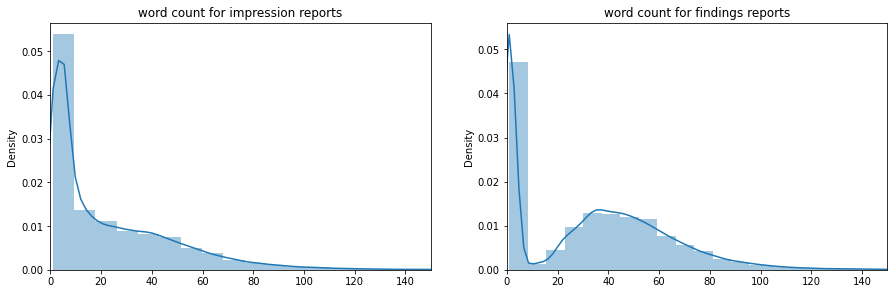

In [13]:
#plot words count 
fig = plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
plt.title('word count for impression reports')
plt.xlim([0, 150])
sns.distplot(impression_word_count)

plt.subplot(2,2,2)
plt.title('word count for findings reports')
plt.xlim([0, 150])
sns.distplot(findings_word_count)

### Distribution of re-examinations of patients 

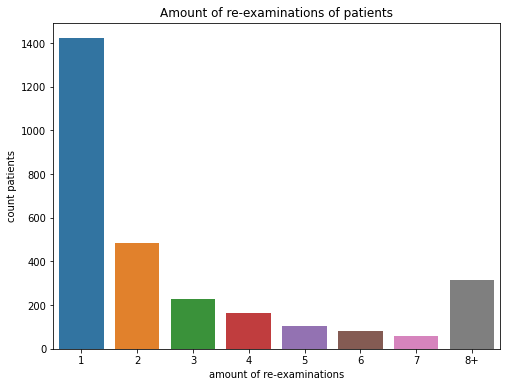

In [ ]:
#Amount of re-examinations of patients
x = ['1', '2', '3', '4', '5', '6', '7', '8+']

fig = plt.figure(figsize = (8,6))

ax = sns.barplot(x=x, y=studies_arr)
ax.set(xlabel ='amount of re-examinations', ylabel ='count patients')
plt.title('Amount of re-examinations of patients')
plt.show()

### pie chart of re-examinations of patients

Text(0.5, 1.0, 'Patients history')

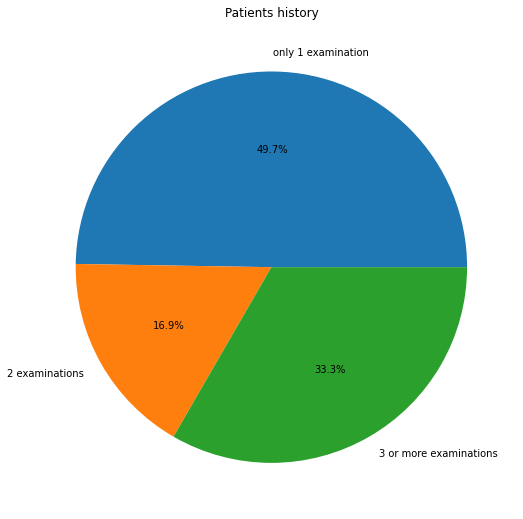

In [ ]:

labels = ['only 1 examination', '2 examinations', '3 or more examinations']

#indices = [2:] 
#three_more = studies_arr[indices].sum()
short_studies_arr = [studies_arr[0], studies_arr[1], studies_arr[2:].sum()]

fig = plt.figure(figsize = (15,9))
plt.pie(short_studies_arr, labels = labels, autopct = '%1.1f%%')
plt.title("Patients history")